In [1]:
# Numerical/scientific computing packages.
import numpy as np
import scipy
import copy
import pandas as pd
import seaborn as sns
import csv

# Machine learning package.
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt

print('Finished successfully loading packages')

Finished successfully loading packages


In [2]:
# importing my N-number
import random
random.seed(18618637)

In [3]:
df = pd.read_csv("dataSet/musicData.csv")

In [4]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [5]:
print("Unique key values: ", set(df["key"]))
print("Unique mode values: ", set(df["mode"]))
print("Unique music_genre values: ", set(df["music_genre"]))

Unique key values:  {'F', 'F#', 'A', 'G#', 'G', 'C#', 'D', 'A#', nan, 'B', 'D#', 'C', 'E'}
Unique mode values:  {nan, 'Major', 'Minor'}
Unique music_genre values:  {'Rap', 'Electronic', 'Rock', 'Anime', 'Alternative', 'Jazz', 'Hip-Hop', 'Country', 'Blues', nan, 'Classical'}


In [6]:
nan_counts_per_column = df.isna().sum()
nan_counts_per_column

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the data and transform it
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
nan_counts_per_column = df_imputed.isna().sum()
nan_counts_per_column

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [8]:
def count_values_per_col(df: pd.DataFrame, col_name: str, value_to_count: any):
    count_vals = (df_imputed[col_name] == value_to_count).sum()
    return "Number of values equal to {} in '{}' column: {}".format(value_to_count, col_name, count_vals)

count_values_per_col(df_imputed, "duration_ms", -1)

"Number of values equal to -1 in 'duration_ms' column: 4944"

In [9]:
mean_duration = df_imputed.loc[df_imputed['duration_ms'] != -1, 'duration_ms'].mean()
# replace -1 values with the mean
df_imputed.loc[df_imputed['duration_ms'] == -1, 'duration_ms'] = mean_duration

In [10]:
count_values_per_col(df_imputed, "duration_ms", -1)

"Number of values equal to -1 in 'duration_ms' column: 0"

In [11]:
count_values_per_col(df_imputed, "tempo", "?")

"Number of values equal to ? in 'tempo' column: 4985"

In [12]:
df_imputed['tempo'] = df_imputed['tempo'].replace("?", float("NaN"))
df_imputed['tempo'] = df_imputed['tempo'].astype(float)
mean_tempo = df_imputed.loc[~df_imputed['tempo'].isna(), 'tempo'].mean()
df_imputed['tempo'] = df_imputed['tempo'].replace(float("NaN"), mean_tempo)
df_imputed['popularity'] = df['popularity'] / 100

In [17]:
count_values_per_col(df_imputed, "tempo", "?")

"Number of values equal to ? in 'tempo' column: 0"

In [13]:
print("Unique key values: ", set(df_imputed["key"]))
print("Unique mode values: ", set(df_imputed["mode"]))
print("Unique music_genre values: ", set(df_imputed["music_genre"]))

df_imputed.dropna()
df_imputed.reset_index()
df_imputed.head()

mean_popularity = df_imputed.loc[~df_imputed['popularity'].isna(), 'popularity'].mean()
df_imputed['popularity'] = df_imputed['popularity'].replace(float("NaN"), mean_popularity)

print("NaN value rows: ", df_imputed.isna().sum())

Unique key values:  {'F', 'F#', 'A', 'G#', 'G', 'C#', 'D', 'A#', 'B', 'D#', 'C', 'E'}
Unique mode values:  {'Major', 'Minor'}
Unique music_genre values:  {'Rap', 'Electronic', 'Rock', 'Anime', 'Alternative', 'Jazz', 'Hip-Hop', 'Country', 'Blues', 'Classical'}
NaN value rows:  instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64


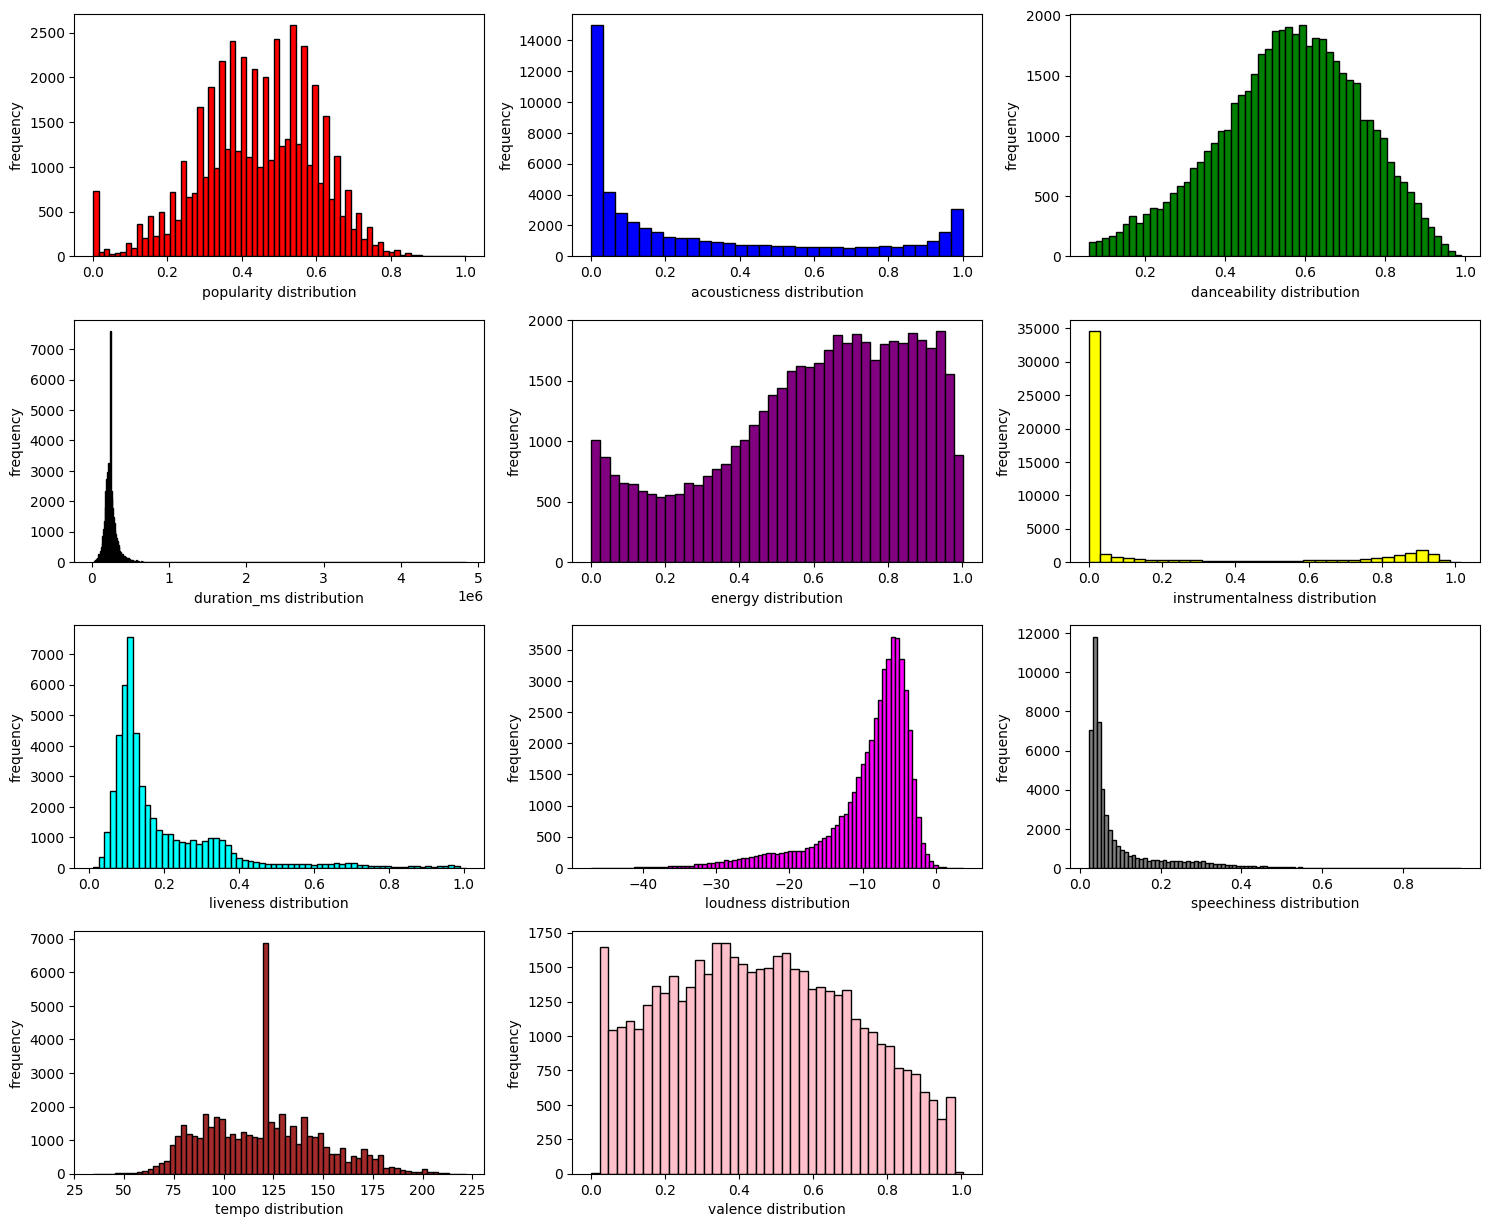

In [14]:
def plot_freq_dist(predictor, dataframe, color: str = "red", ax=None):
    """
    data: 1d dataframe to plot on the graph
    """
    data = dataframe[predictor]
    data_size = data.shape[0]
    # Let's use the Scott's rule for choosing the right bin width
    w = 3.49 * np.std(data)/data_size**(1./3)

    # define number of bins with accordance to the appropriate size 
    bins = np.arange(data.min(), data.max() + w, w, dtype=float)

    if ax is None:
        ax = plt.gca()
    ax.hist(data, color=color, edgecolor="black", bins=bins) 
    ax.set_xlabel("{} distribution".format(predictor))
    ax.set_ylabel("frequency")


predictors = ["popularity", "acousticness", "danceability", 
              "duration_ms", "energy", "instrumentalness", 
              "liveness", "loudness", "speechiness", 
              "tempo", "valence"]

colors = ['red', 'blue', 'green', 'orange', 'purple',
          'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'teal', 'lavender']

num_rows = 5
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, predictor in enumerate(predictors):
    row_index = i // num_cols
    col_index = i % num_cols
    plot_freq_dist(predictor, dataframe=df_imputed, color=colors[i], ax=axes[row_index, col_index])

for i in range(len(predictors), num_rows*num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

In [49]:
df = df_imputed
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,0.27,0.00468,0.652,245503.541466,0.941,0.792,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,0.31,0.0127,0.622,218293.0,0.89,0.95,D,0.124,-7.043,Minor,0.03,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,0.28,0.00306,0.62,215613.0,0.755,0.0118,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,0.34,0.0254,0.774,166875.0,0.7,0.00253,C#,0.157,-4.498,Major,0.239,128.014,4-Apr,0.27,Electronic
4,24907.0,What So Not,Divide & Conquer,0.32,0.00465,0.638,222369.0,0.587,0.909,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


---

### Let's start with PCA

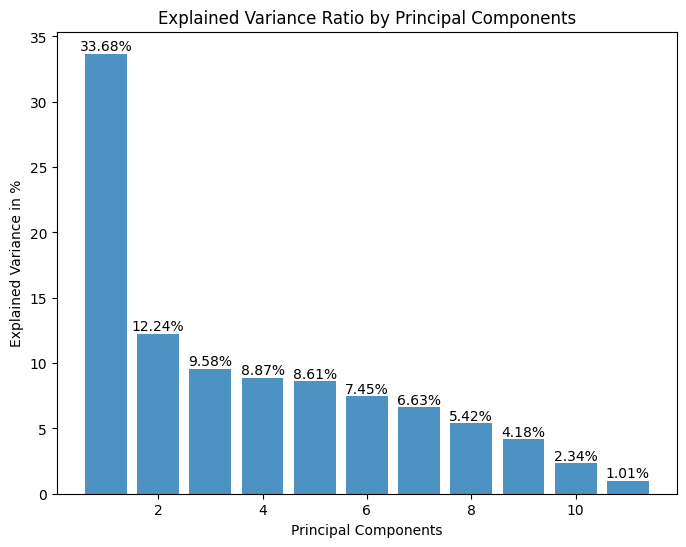

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df_to_standardize = df[predictors]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_to_standardize)
df_standardized = pd.DataFrame(standardized_data, columns=df_to_standardize.columns)
df_standardized.columns = [col + "_stand" for col in df_to_standardize.columns]

pca = PCA(n_components=df_standardized.shape[1])
principalComponents = pca.fit_transform(df_standardized)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.8, align='center')

for bar, value in zip(bars, explained_variance):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.2f}%', ha='center', va='bottom')

plt.ylabel('Explained Variance in %')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

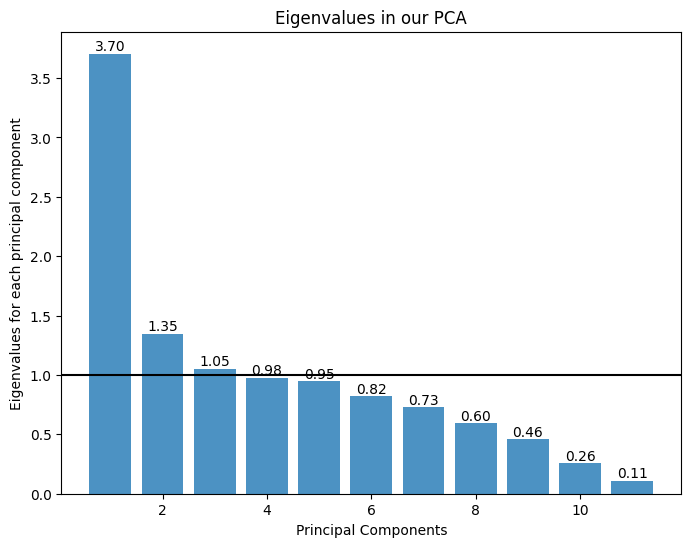

In [21]:
# eigenvalues
eigenvalues = pca.explained_variance_

plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, align='center')
plt.axhline(y=1, color='k', linestyle='-')  # Add a horizontal line at y=0

for bar, value in zip(bars, eigenvalues):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.ylabel('Eigenvalues for each principal component')
plt.xlabel('Principal Components')
plt.title('Eigenvalues in our PCA')
plt.show()

In [44]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_standardized)
loadings = pca.components_
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component #1', 'principal component #2', 'principal component #3'])
loadingsDf = pd.DataFrame(data=loadings.T, columns=['PC1_loading', 'PC2_loading', 'PC1_loading'], index=df_standardized.columns)

print("Principal Component Loadings:")
loadingsDf

Principal Component Loadings:


,PC1_loading,PC2_loading,PC1_loading
popularity_stand,-0.252123,-0.372581,0.195738
acousticness_stand,0.423037,-0.228579,0.052788
danceability_stand,-0.302750,-0.455458,-0.074438
duration_ms_stand,0.123211,0.346575,0.187620
energy_stand,-0.437829,0.319000,-0.077902
instrumentalness_stand,0.338320,0.112151,-0.107004
liveness_stand,-0.084492,0.340930,0.599859
loudness_stand,-0.457070,0.182026,-0.065189
speechiness_stand,-0.174069,-0.282897,0.631663
tempo_stand,-0.146736,0.345567,-0.112152


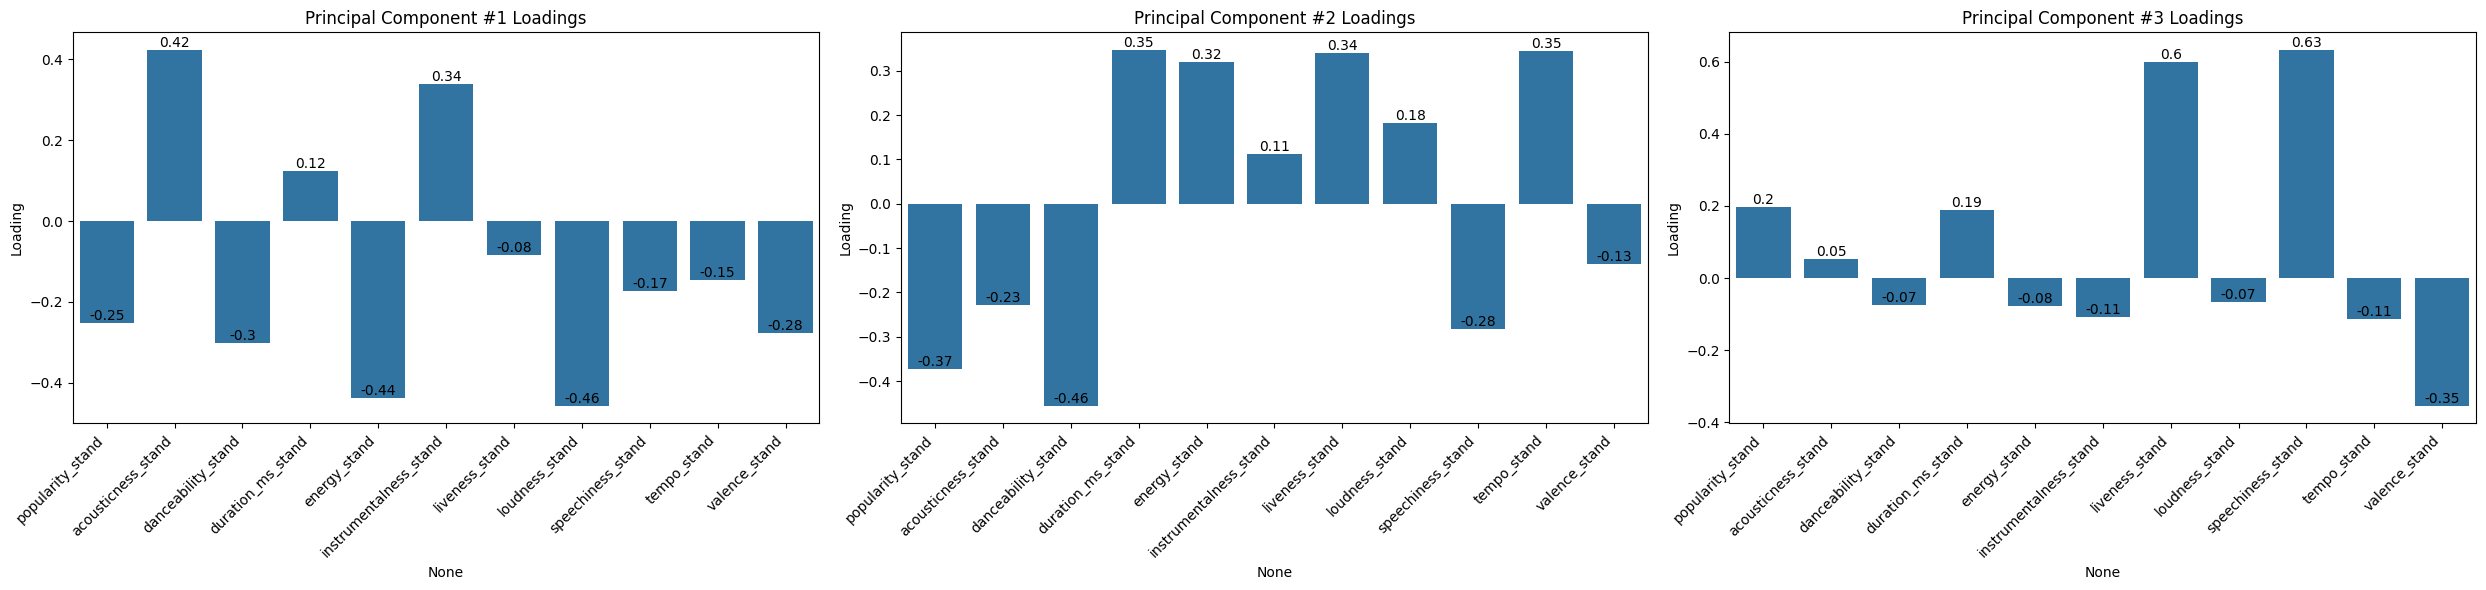

In [31]:
import seaborn as sns

loadingsDf = pd.DataFrame(data=loadings.T, columns=['PC1_loading', 'PC2_loading', 'PC3_loading'], index=df_standardized.columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

for i in range(3):
    sns.barplot(x=loadingsDf.index, y=f'PC{i+1}_loading', data=loadingsDf, ax=axes[i])
    axes[i].set_title(f'Principal Component #{i+1} Loadings')
    axes[i].set_ylabel('Loading')
    
    axes[i].set_xticks(range(len(loadingsDf.index)))
    axes[i].set_xticklabels(loadingsDf.index, rotation=45, ha='right')

    for idx, value in enumerate(loadingsDf[f'PC{i+1}_loading']):
        axes[i].text(idx, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [43]:
threshold = 0.35
sorted_loadings = loadingsDf.abs().sort_values(by=['PC1_loading', 'PC2_loading', 'PC3_loading'], ascending=False)

significant_variables_pc1 = sorted_loadings[sorted_loadings['PC1_loading'].abs() > threshold][['PC1_loading']].sort_values(by=['PC1_loading'], ascending=False)
significant_variables_pc2 = sorted_loadings[sorted_loadings['PC2_loading'].abs() > threshold][['PC2_loading']].sort_values(by=['PC2_loading'], ascending=False)
significant_variables_pc3 = sorted_loadings[sorted_loadings['PC3_loading'].abs() > threshold][['PC3_loading']].sort_values(by=['PC3_loading'], ascending=False)

print("Significant variables for PC1:")
print(significant_variables_pc1)
print("\nSignificant variables for PC2:")
print(significant_variables_pc2)
print("\nSignificant variables for PC3:")
print(significant_variables_pc3)

Significant variables for PC1:
                    PC1_loading
loudness_stand         0.457070
energy_stand           0.437829
acousticness_stand     0.423037

Significant variables for PC2:
                    PC2_loading
danceability_stand     0.455458
popularity_stand       0.372581

Significant variables for PC3:
                   PC3_loading
speechiness_stand     0.631663
liveness_stand        0.599859
valence_stand         0.353530
